## GBM

In [ ]:

install.packages("caret")
install.packages("e1071")
install.packages("gbm")
install.packages("dummies")
install.packages("reshape")
library(caret)
library(reshape)
library(gbm)
options(warn=-1)


In [ ]:
source ("cruzadas avnnet y log binaria.R")
source ("cruzada arbolbin.R")
source ("cruzada rf binaria.R")
source ("cruzada gbm binaria.R")

In [3]:
load("data.Rda")
head(data)

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


## Set de variables clásico

### Tuneado de GBM con Caret



Caret permite tunear estos parámetros básicos:

- shrinkage (parámetro v de regularización, mide la velocidad de ajuste, a menor v, más lento y necesita más iteraciones, pero es más fino en el ajuste)
- n.minobsinnode: tamaño máximo de nodos finales (el principal parámetro que mide la complejidad)
- n.trees=el número de iteraciones (árboles)
- interaction.depth (2 para árboles binarios)

In [15]:
set.seed(40)

gbmgrid<-expand.grid(shrinkage=c(0.2,0.1,0.05,0.03,0.01,0.001),
 n.minobsinnode=c(5,10,20),
 n.trees=c(100,500,1000,5000),
 interaction.depth=c(2))

control<-trainControl(method = "cv",number=4,savePredictions = "all",
 classProbs=TRUE) 

gbm_1<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
            data=data,
            method="gbm",
            trControl=control,
            tuneGrid=gbmgrid,
            distribution="bernoulli",
            bag.fraction=1,
            verbose=FALSE)



In [16]:
gbm_1


Stochastic Gradient Boosting 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 4776, 4774, 4775, 4776 
Resampling results across tuning parameters:

  shrinkage  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.001       5               100     0.5536360  0.0000000
  0.001       5               500     0.8781208  0.7471996
  0.001       5              1000     0.8785917  0.7482364
  0.001       5              5000     0.8803191  0.7519913
  0.001      10               100     0.5536360  0.0000000
  0.001      10               500     0.8781208  0.7471996
  0.001      10              1000     0.8785917  0.7482364
  0.001      10              5000     0.8803191  0.7519913
  0.001      20               100     0.5536360  0.0000000
  0.001      20               500     0.8781208  0.7471996
  0.001      20              1000     0.8785917  0.7482364
  0.001      20              5000     0.8803191  0.751

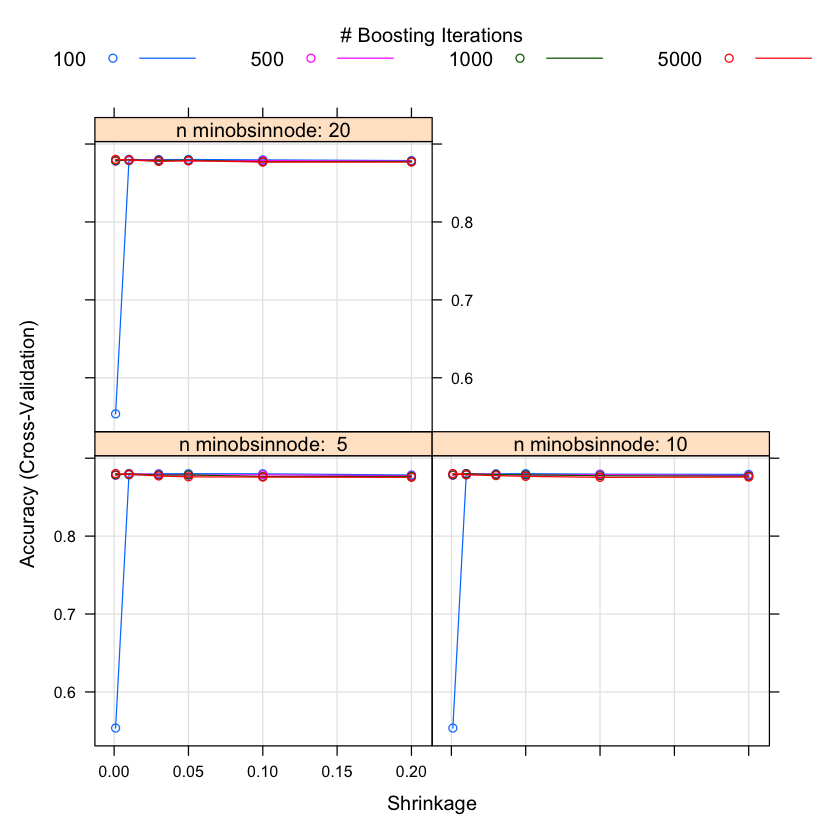

In [17]:
plot(gbm_1)

Como se ve en los gráficos, no están influyendo demasiado ni el n.tress, ni el tamaño máximo de os nodos finales, a partir de un shrinkage = 0.03 los valores de Accuracy se mantienen más o mmenos estables.No obstante parametrizamos con los datos obtenidos
 - expand.grid(shrinkage=c(0.03),
 - n.minobsinnode=c(5),
 - n.trees=c(100),
 - interaction.depth=c(2))#árbol binario

### Estudio de early stopping


Probamos a fijar algunos parámetros para ver como evoluciona con diferentes iteraciones ya parametrizado, y observamos cuántas seria bueno utilizar.


In [18]:
set.seed(40)

gbmgrid<-expand.grid(shrinkage=c(0.03),
 n.minobsinnode=c(5),
 n.trees=c(50,100,300,500,800,1000,1200,1800,2500,4000,9000,20000),
 interaction.depth=c(2))

control<-trainControl(method = "cv",number=10,savePredictions = "all",
 classProbs=TRUE) 

gbm_11<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
            data=data,
            method="gbm",
            trControl=control,
            tuneGrid=gbmgrid,
            distribution="bernoulli",
            bag.fraction=1,
            verbose=FALSE)



In [19]:
gbm_11


Stochastic Gradient Boosting 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5731, 5730, 5730, 5730, 5730, ... 
Resampling results across tuning parameters:

  n.trees  Accuracy   Kappa    
     50    0.8785921  0.7482368
    100    0.8796908  0.7506065
    300    0.8801615  0.7518338
    500    0.8803187  0.7522225
    800    0.8801620  0.7519811
   1000    0.8790631  0.7497362
   1200    0.8793775  0.7504024
   1800    0.8785921  0.7488379
   2500    0.8785924  0.7488543
   4000    0.8784351  0.7485732
   9000    0.8773372  0.7463799
  20000    0.8751392  0.7419695

Tuning parameter 'interaction.depth' was held constant at a value of 2

Tuning parameter 'shrinkage' was held constant at a value of 0.03

Tuning parameter 'n.minobsinnode' was held constant at a value of 5
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were n.trees 

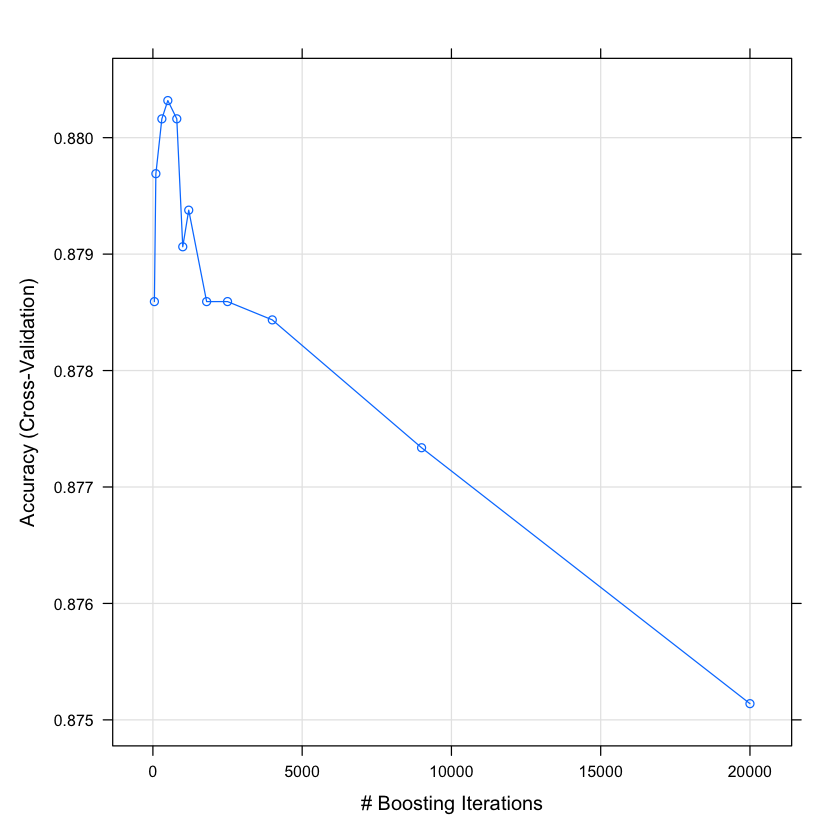

In [20]:
plot(gbm_11)

Por lo que vemos, con el ntree en 500 se optimiza, luego dejaremos ese valor.


### Mejor modelo con el set de variables variables básico.


In [21]:
medias1<-cruzadagbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       n.minobsinnode=5,
                       shrinkage=0.03,
                       n.trees=500,
                       interaction.depth=2)

medias1$modelo="gbm1"

  n.minobsinnode shrinkage n.trees interaction.depth  Accuracy     Kappa
1              5      0.03     500                 2 0.8790319 0.7496926
   AccuracySD    KappaSD
1 0.007446465 0.01571441


## Importancia variables

,var,rel.inf
,<chr>,<dbl>
hosp_y,hosp_y,84.8161921
highbp_nk,highbp_nk,3.9137943
stroke_nk,stroke_nk,3.2589717
angina_nk,angina_nk,2.2567198
smstat_nk,smstat_nk,2.1513110
age,age,2.0400476
stroke_y,stroke_y,0.5962343
angina_y,angina_y,0.5122765
yronset,yronset,0.4544528


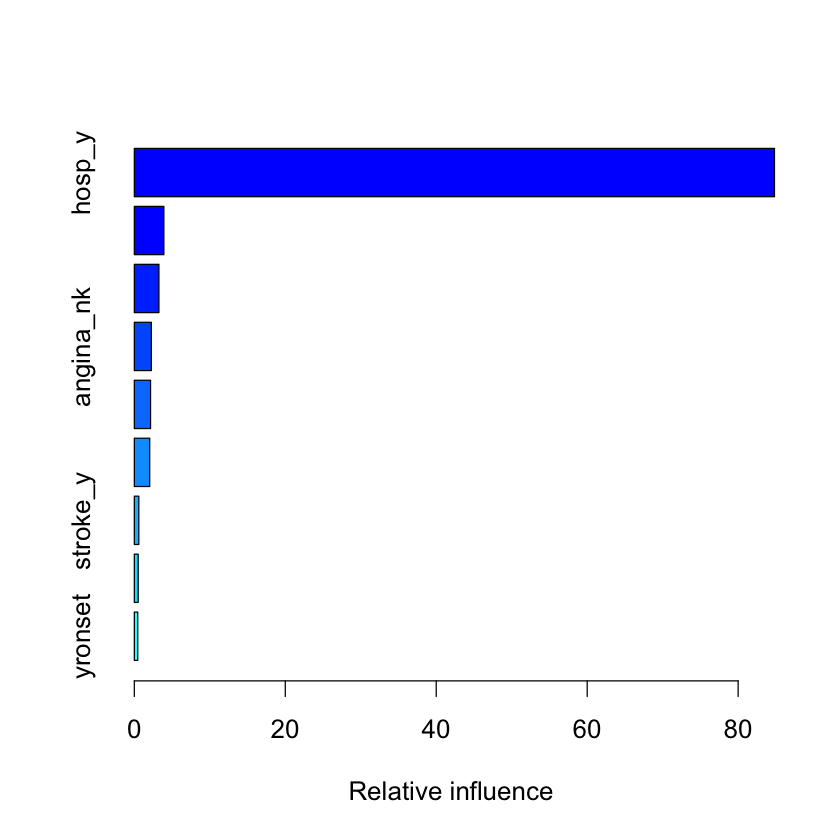

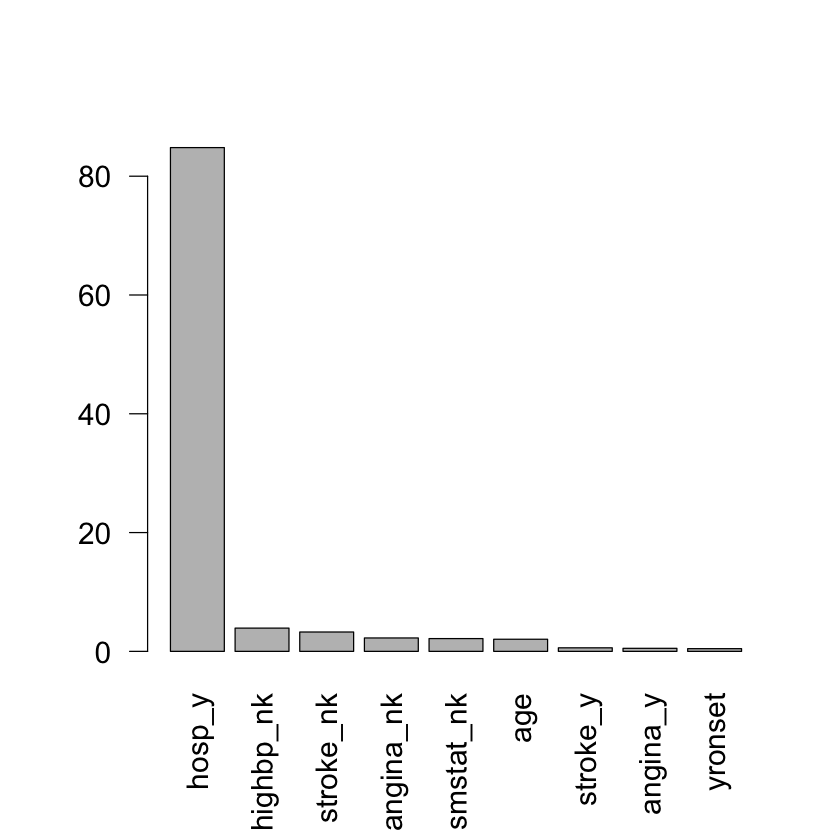

In [22]:
# IMPORTANCIA DE VARIABLES
par(cex=1.3)
summary(gbm_11)

tabla<-summary(gbm_11)
par(cex=1.5,las=2)
barplot(tabla$rel.inf,names.arg=row.names(tabla))


Tiene sentido este gráfico de importancia de variables, al destacar la variable hosp_y también en el gráfico de importancia de variables de Random Forest. Vamos a eliminar de momento stroke_y, angina_y, yronset. Nos vamos a quedar con un set de seis variables:
- hosp_y+highbp_nk+age+angina_nk+smstat_nk+stroke_nk,

## Segundo set de variables

### Tuneado on el nuevo set de variables con Caret

In [23]:
set.seed(40)

gbmgrid<-expand.grid(shrinkage=c(0.2,0.1,0.05,0.03,0.01,0.001),
 n.minobsinnode=c(5,10,20),
 n.trees=c(100,500,1000,5000),
 interaction.depth=c(2))

control<-trainControl(method = "cv",number=4,savePredictions = "all",
 classProbs=TRUE) 

gbm_2<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+smstat_nk+stroke_nk,
            data=data,
            method="gbm",
            trControl=control,
            tuneGrid=gbmgrid,
            distribution="bernoulli",
            bag.fraction=1,
            verbose=FALSE)



In [24]:
gbm_2

Stochastic Gradient Boosting 

6367 samples
   6 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 4776, 4774, 4775, 4776 
Resampling results across tuning parameters:

  shrinkage  n.minobsinnode  n.trees  Accuracy   Kappa    
  0.001       5               100     0.5536360  0.0000000
  0.001       5               500     0.8781208  0.7471996
  0.001       5              1000     0.8785917  0.7482364
  0.001       5              5000     0.8801620  0.7516770
  0.001      10               100     0.5536360  0.0000000
  0.001      10               500     0.8781208  0.7471996
  0.001      10              1000     0.8785917  0.7482364
  0.001      10              5000     0.8801620  0.7516770
  0.001      20               100     0.5536360  0.0000000
  0.001      20               500     0.8781208  0.7471996
  0.001      20              1000     0.8785917  0.7482364
  0.001      20              5000     0.8801620  0.751

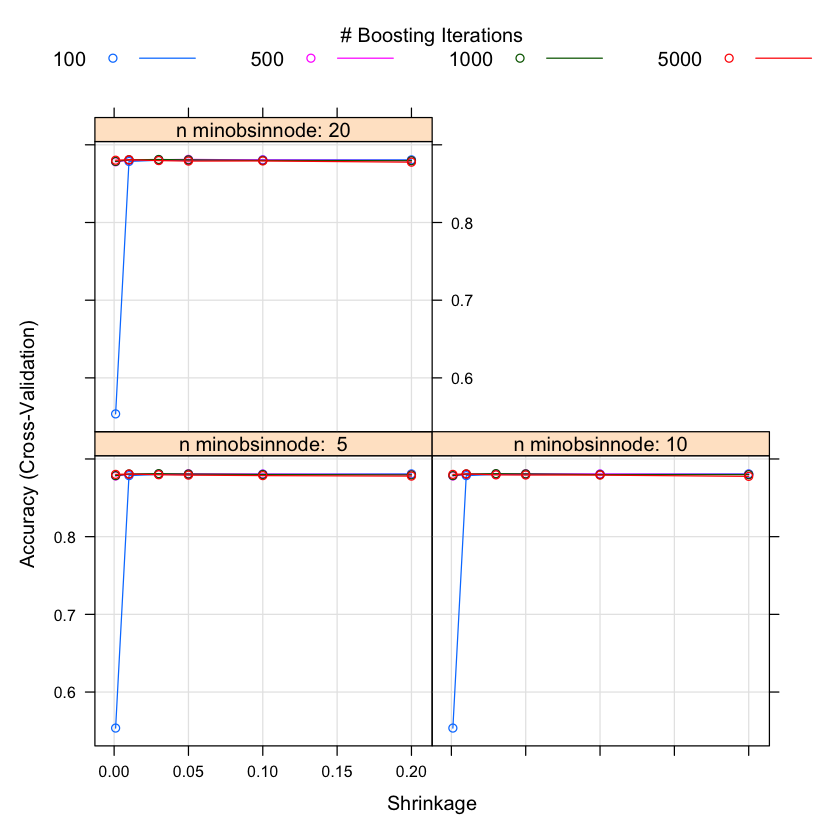

In [25]:
plot(gbm_2)

### Estudio de early stopping

In [27]:
set.seed(40)

gbmgrid<-expand.grid(shrinkage=c(0.1),
 n.minobsinnode=c(10),
 n.trees=c(50,100,300,500,800,1000,1200,1800,2500,4000,9000,20000),
 interaction.depth=c(2))

control<-trainControl(method = "cv",number=10,savePredictions = "all",
 classProbs=TRUE) 

gbm_21<- train(factor(outcome)~
            hosp_y+highbp_nk+age+angina_nk+smstat_nk+stroke_nk,
            data=data,
            method="gbm",
            trControl=control,
            tuneGrid=gbmgrid,
            distribution="bernoulli",
            bag.fraction=1,
            verbose=FALSE)



In [28]:
gbm_21

Stochastic Gradient Boosting 

6367 samples
   6 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5731, 5730, 5730, 5730, 5730, ... 
Resampling results across tuning parameters:

  n.trees  Accuracy   Kappa    
     50    0.8800045  0.7513617
    100    0.8814179  0.7544213
    300    0.8804767  0.7524919
    500    0.8806342  0.7528082
    800    0.8800060  0.7515385
   1000    0.8795353  0.7505753
   1200    0.8798492  0.7512260
   1800    0.8793780  0.7502811
   2500    0.8796917  0.7509287
   4000    0.8785928  0.7487011
   9000    0.8770220  0.7454836
  20000    0.8760793  0.7435859

Tuning parameter 'interaction.depth' was held constant at a value of 2

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were n.trees 

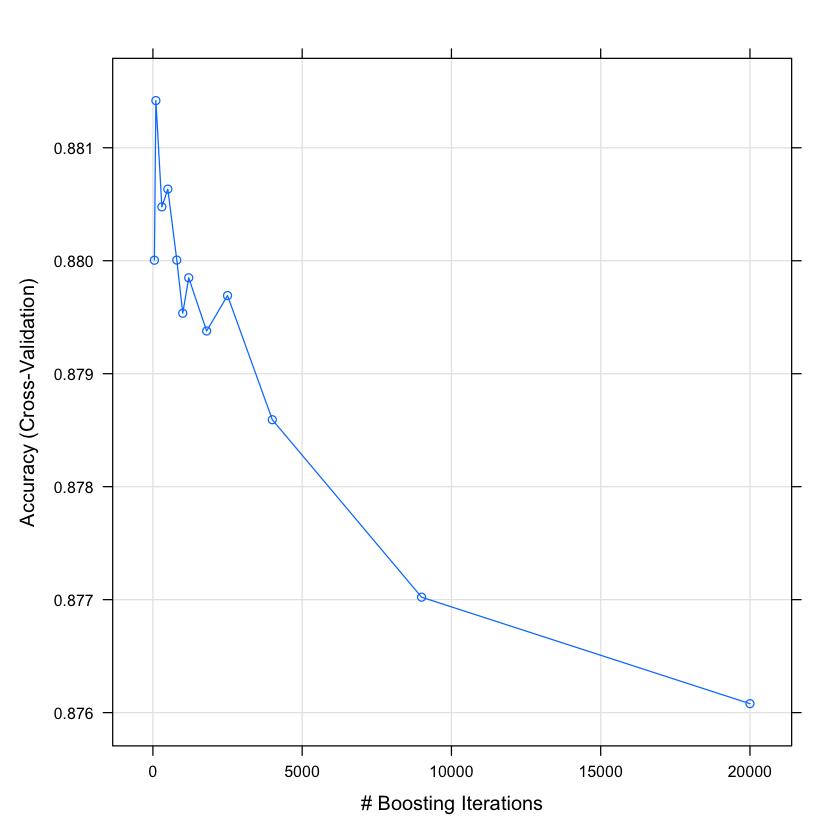

In [29]:
plot(gbm_21)

Se aprecia que con 1800 tenemos un máximo y luego ya son descensos, luego fijamos el ntrees en 1800.

### Mejor modelo con el nuevo set de variables.

In [30]:
medias2<-cruzadagbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", 
"smstat_nk", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       n.minobsinnode=10,
                       shrinkage=0.1,
                       n.trees=1800,
                       interaction.depth=2)

medias2$modelo="gbm2"

  n.minobsinnode shrinkage n.trees interaction.depth  Accuracy     Kappa
1             10       0.1    1800                 2 0.8793618 0.7502655
   AccuracySD    KappaSD
1 0.006956234 0.01471328


## Elección mejor modelo GBM

Comparamos los 2 mejores modelos GBM, tras ser tuneados por seprado conforme a sus variables, el medias 1 y el medias 2. 

In [31]:
union1<-rbind(medias1,medias2)

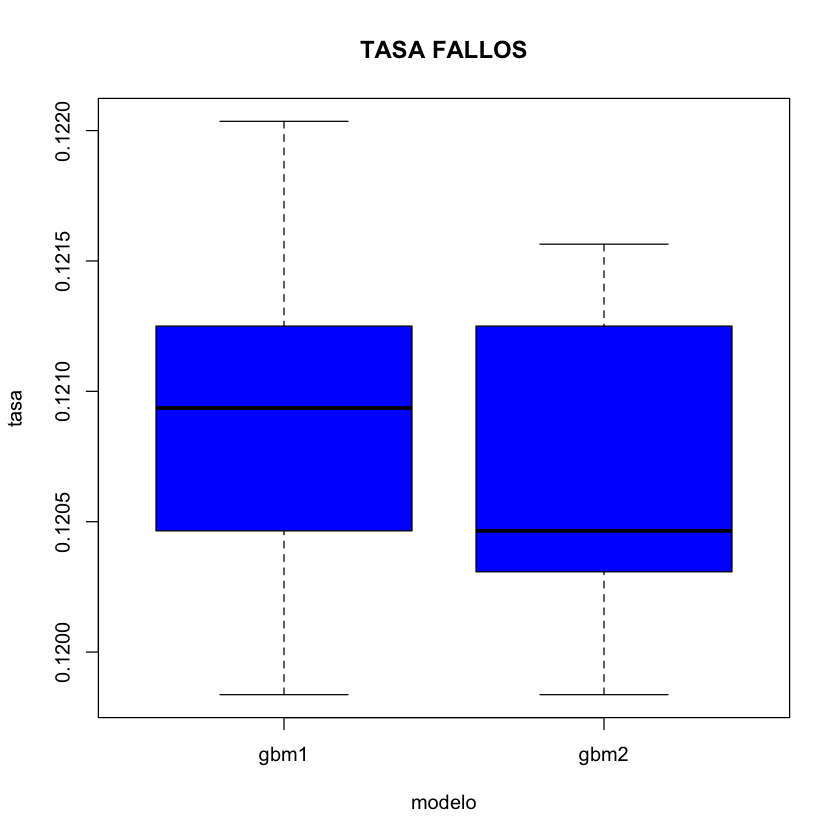

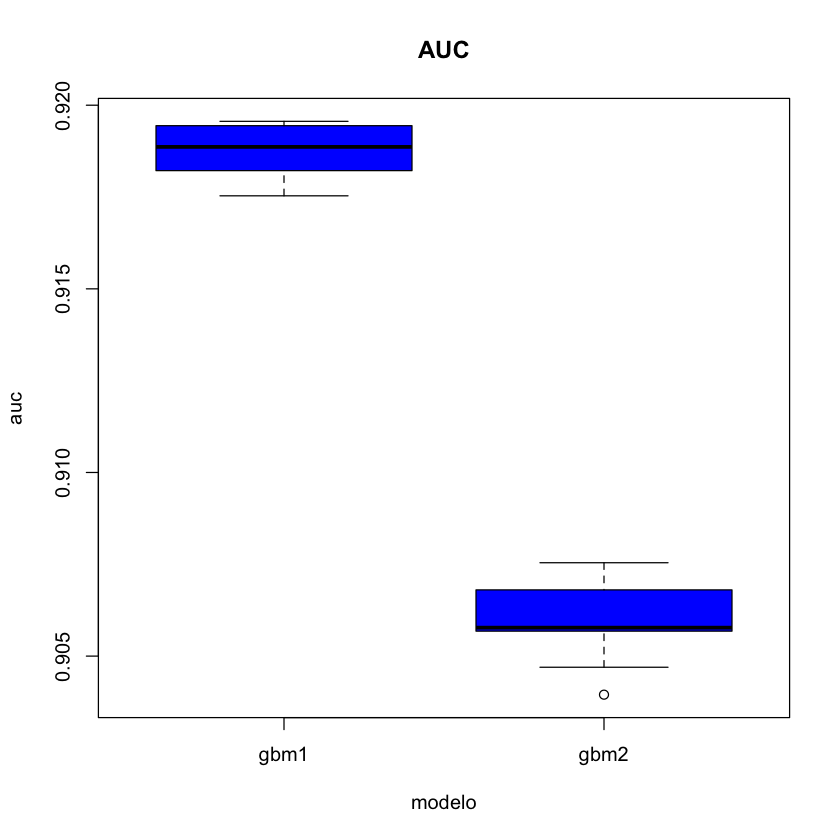

In [32]:
par(cex.axis=1.0)

boxplot(data=union1,tasa~modelo,main="TASA FALLOS",col="blue")
boxplot(data=union1,auc~modelo,main="AUC",col="blue")


Tal y como se aprecia en el gráfico box plot, el modelo GBM sobre el set clásico de variables propociona una tasa de fallos casi equivalente que el otro, pero por el contrario, presenta un área bajo la curva mayor y por tanto medias 1 es el elegido.

Modelo medias1:

- variales: "hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", "smstat_nk", "yronset", "stroke_y", "stroke_nk"
- n.minobsinnode=5
- shrinkage=0.03
- n.trees=500
- interaction.depth=2


## Comparación con otros modelos del resto de algoritmos

In [4]:
#Mejor modelo de regresión logística (medias3 de EDA_NNET)
medias_1<-cruzadalogistica(data=data,
                    vardep=c("outcome"),
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


 medias_1$modelo="Logística"


In [ ]:
#mejor modelo de red neuronal(medias9 de EDA_NNET)
medias_2<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

  medias_2$modelo="avnnet"

In [ ]:
stopped after 500 iterations
  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8767774 0.7450545 0.01110455 0.02346587

In [6]:
#mejor modelo de árbol
medias_3<-cruzadaarbolbin(data=data,
                     vardep="outcome",
                     listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                     listclass=c(""),
                     grupos=10,
                     sinicio=1234,
                     repe=5,
                     cp=c(0),
                     minbucket =40)

medias_3$modelo="arbol"

  cp  Accuracy     Kappa AccuracySD    KappaSD
1  0 0.8720909 0.7362186 0.01168732 0.02436023


In [7]:
#mejor modelo de bagging
  medias_4<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias_4$modelo="bagging"


  mtry  Accuracy    Kappa  AccuracySD   KappaSD
1    9 0.8790632 0.749648 0.007291974 0.0154251


In [8]:
#mejor modelo Random Forest
medias_5<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias_5$modelo="rf"


  mtry  Accuracy     Kappa  AccuracySD   KappaSD
1    3 0.8794873 0.7504862 0.007499957 0.0158603


In [9]:
#mejor modelo GBM
medias_6<-cruzadagbmbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       n.minobsinnode=5,
                       shrinkage=0.03,
                       n.trees=500,
                       interaction.depth=2)

medias_6$modelo="gbm"

  n.minobsinnode shrinkage n.trees interaction.depth  Accuracy     Kappa
1              5      0.03     500                 2 0.8790319 0.7496926
   AccuracySD    KappaSD
1 0.007446465 0.01571441


In [10]:
union3<-rbind(medias_1,medias_2,medias_3,medias_4,medias_5,medias_6)

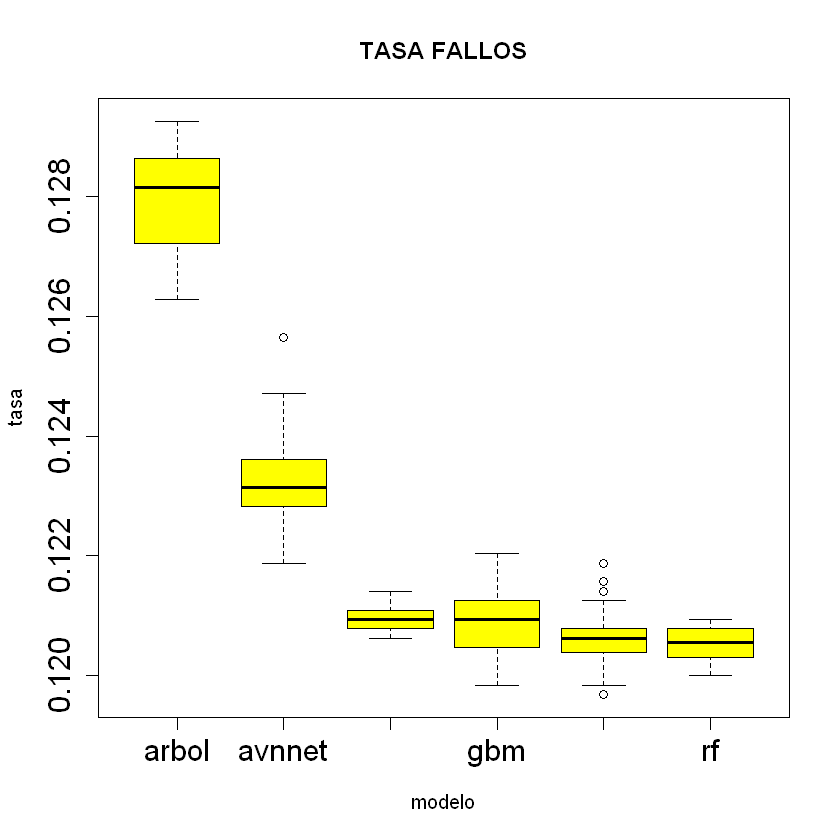

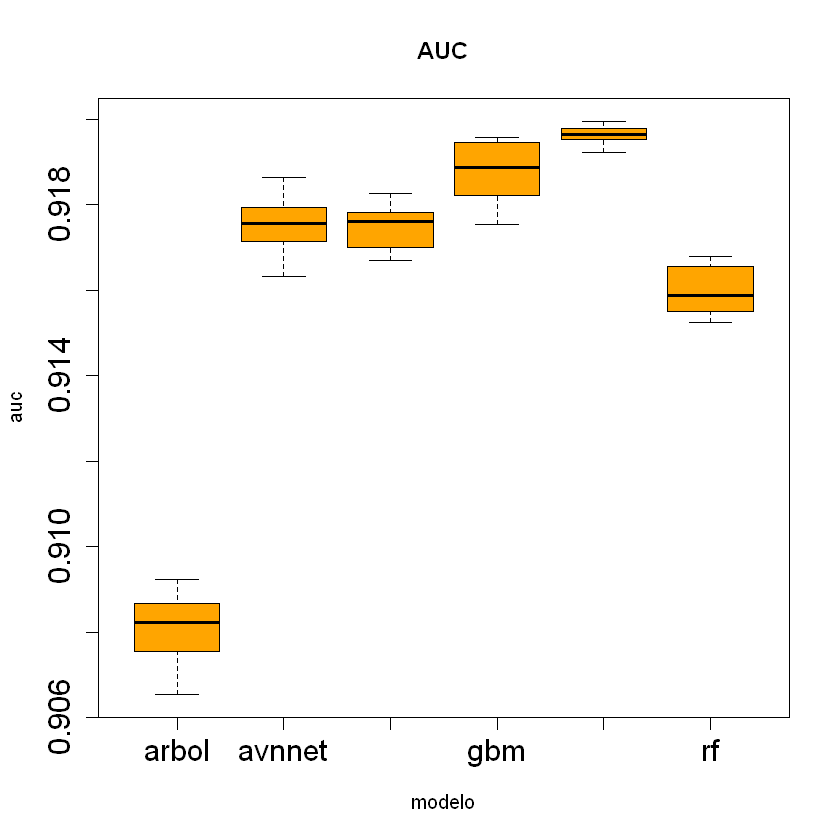

In [11]:
par(cex.axis=1.5)
boxplot(data=union3,tasa~modelo,main="TASA FALLOS",col="yellow")
boxplot(data=union3,auc~modelo,main="AUC",col="orange")

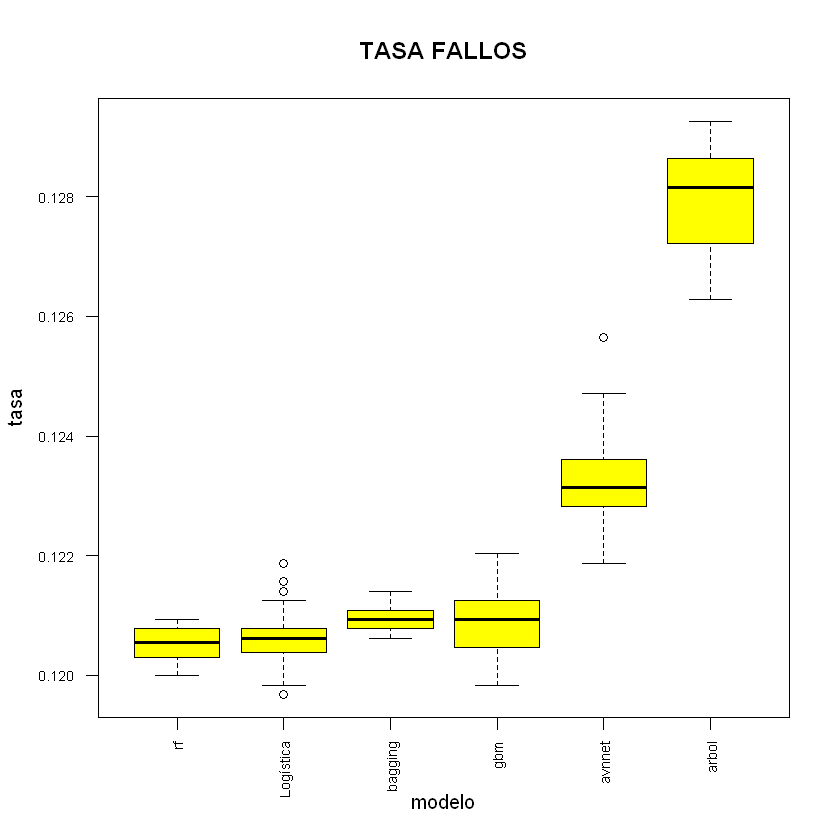

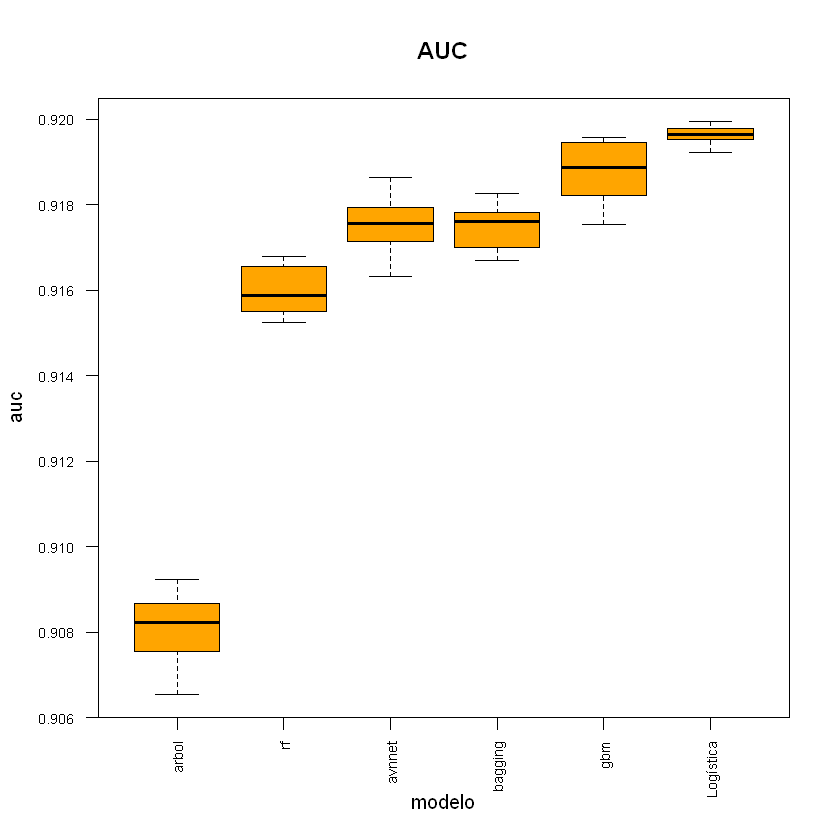

In [12]:
uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,tasa, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,tasa~modelo,col="yellow",main="TASA FALLOS")

uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,auc, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,auc~modelo,col="orange",main="AUC")


### Modelo ganador

Se aprecia el GBM como un modelo muy muy competitivo, que hasta la fech mejora en AUC a todos excepto a la Logística, a la que no llega a superar ni en AUC ni en tasa de fallos.